In [37]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from dotenv import load_dotenv
from pathlib import Path

создаем директорию charts

In [38]:
p = Path.cwd()
d = p / 'charts'
d.mkdir(exist_ok=True)

запрос данных визитов по API

In [39]:
load_dotenv()

DATE_BEGIN = os.getenv('DATE_BEGIN')
DATE_END = os.getenv('DATE_END')
API_URL = os.getenv('API_URL')
visits = requests.get(f'{API_URL}/visits', params={'begin': DATE_BEGIN, 'end': DATE_END})
data_visits = visits.json()
df_visits = pd.DataFrame(data_visits)
df_visits['datetime'] = pd.to_datetime(df_visits['datetime'])
df_visits.head()

,datetime,platform,user_agent,visit_id
0,2023-03-01 10:36:22,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
1,2023-02-26 19:48:19,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
2,2023-03-01 06:25:00,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,f149f542-e935-4870-9734-6b4501eaf614
3,2023-02-26 03:58:26,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,f149f542-e935-4870-9734-6b4501eaf614
4,2023-02-26 06:55:23,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,f149f542-e935-4870-9734-6b4501eaf614


фильтрация визитов за период 2023-03-01 -> 2023-09-01

In [40]:
start_date = '2023-03-01'
end_date = '2023-09-01'
filtered_visits = df_visits[(df_visits['datetime'] >= start_date) & (df_visits['datetime'] <= end_date)]
filtered_visits.head()

,datetime,platform,user_agent,visit_id
0,2023-03-01 10:36:22,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
2,2023-03-01 06:25:00,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,f149f542-e935-4870-9734-6b4501eaf614
5,2023-03-01 10:26:13,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
8,2023-03-01 12:33:06,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,19322fed-157c-49c6-b16e-2d5cabeb9592
10,2023-03-01 01:38:35,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,04762a22-3c9f-40c9-9ac9-6628c4381836


загрузка данных регистрации

In [41]:
regs = requests.get(f'{API_URL}/registrations', params={'begin': DATE_BEGIN, 'end': DATE_END})
data_regs = regs.json()
df_regs = pd.DataFrame(data_regs)
df_regs['datetime'] = pd.to_datetime(df_regs['datetime'])
df_regs.head()

,datetime,email,platform,registration_type,user_id
0,2023-03-01 07:40:13,ebyrd@example.org,web,google,2e0f6bb8-b029-4f45-a786-2b53990d37f1
1,2023-03-01 13:14:00,knightgerald@example.org,web,email,f007f97c-9d8b-48b5-af08-119bb8f6d9b6
2,2023-03-01 03:05:50,cherylthompson@example.com,web,apple,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15
3,2023-03-01 00:04:47,halldavid@example.org,web,email,3e9914e1-5d73-4c23-b25d-b59a3aeb2b60
4,2023-03-01 18:31:52,denise86@example.net,web,google,27f875fc-f8ce-4aeb-8722-0ecb283d0760


фильтрация данных регистрации за период 2023-03-01 -> 2023-09-01

In [42]:
filtered_regs = df_regs[(df_regs['datetime'] >= start_date) & (df_regs['datetime'] <= end_date)]
filtered_regs.head()

,datetime,email,platform,registration_type,user_id
0,2023-03-01 07:40:13,ebyrd@example.org,web,google,2e0f6bb8-b029-4f45-a786-2b53990d37f1
1,2023-03-01 13:14:00,knightgerald@example.org,web,email,f007f97c-9d8b-48b5-af08-119bb8f6d9b6
2,2023-03-01 03:05:50,cherylthompson@example.com,web,apple,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15
3,2023-03-01 00:04:47,halldavid@example.org,web,email,3e9914e1-5d73-4c23-b25d-b59a3aeb2b60
4,2023-03-01 18:31:52,denise86@example.net,web,google,27f875fc-f8ce-4aeb-8722-0ecb283d0760


график итоговых регистраций

In [43]:
# меняем формат даты
filtered_regs['datetime'] = pd.to_datetime(filtered_regs['datetime']).dt.date
# аггрегируем регистрации по дате
grouped_regs_by_date = filtered_regs.groupby(['datetime']).count()
grouped_regs_by_date = grouped_regs_by_date.reset_index()
grouped_regs_by_date.head()

,datetime,email,platform,registration_type,user_id
0,2023-03-01,87,87,87,87
1,2023-03-02,106,106,106,106
2,2023-03-03,107,107,107,107
3,2023-03-04,159,159,159,159
4,2023-03-05,115,115,115,115


График регистраций с выделением рекламных кампаний

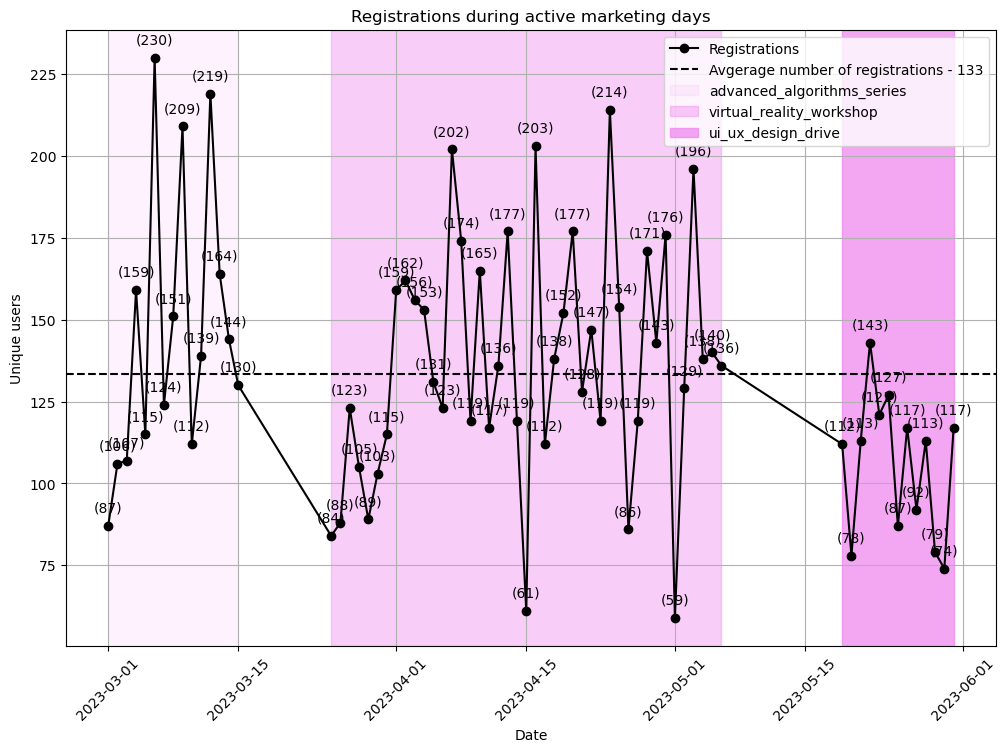

In [44]:
df_ads = pd.read_csv("https://raw.githubusercontent.com/callisto1610/data-analytics-project-100/main/ads%20-%20ads.csv")
df_ads['date'] = pd.to_datetime(df_ads['date']).dt.date
merged = pd.merge(filtered_regs, df_ads, how='left', left_on=['datetime'], right_on =['date'])
unique_regs = merged.groupby(['datetime', 'utm_campaign']).count()
unique_regs = unique_regs.reset_index()
x = unique_regs['datetime']
y = np.array(unique_regs['user_id'])
fig, ax = plt.subplots(figsize=(12, 8)) 
plt.plot(x, y, marker='o', color= 'black', linestyle='-', label = 'Registrations')
# add mean to the graph
plt.axhline(y=np.nanmean(y), color='black', linestyle='--', label=f'Avgerage number of registrations - {round(np.nanmean(y))}')
# Add annotations
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'({yi})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')
 
# Add title and labels
plt.title('Registrations during active marketing days')
plt.xlabel('Date')
plt.ylabel('Unique users')

# Display grid
plt.grid(True)
plt.xticks(rotation = 45)

# color the graph
unique_campaign = unique_regs['utm_campaign'].unique()
for i in range(len(unique_campaign)):
    unique_regs1 = unique_regs[unique_regs['utm_campaign']== unique_campaign[i]]
    xmin = unique_regs1['datetime'].min()
    xmax = unique_regs1['datetime'].max()
    ax.axvspan(xmin, xmax, color = 'violet',alpha=0.1 + 0.3 * i, label = unique_campaign[i])
    plt.legend()
plt.savefig('./charts/Registrations during active marketing days.png')

bar plot для регистрации

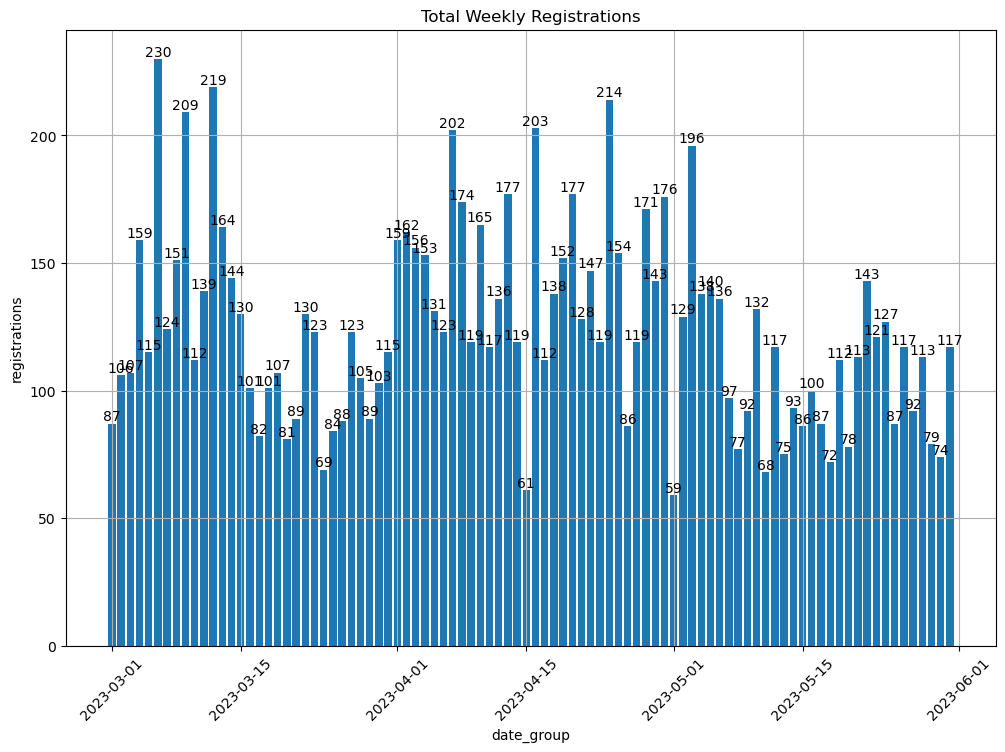

In [45]:
x = grouped_regs_by_date["datetime"]
y = grouped_regs_by_date["user_id"]

fig, ax = plt.subplots(figsize=(12, 8))
bar_container = ax.bar(x, y)
ax.set(ylabel='registrations', title='Total Weekly Registrations')
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.xlabel('date_group')
plt.xticks(rotation = 45)
plt.grid()

plt.savefig('./charts/registrations_by_date.png')

Итоговые регистрации с разбивкой по платформе

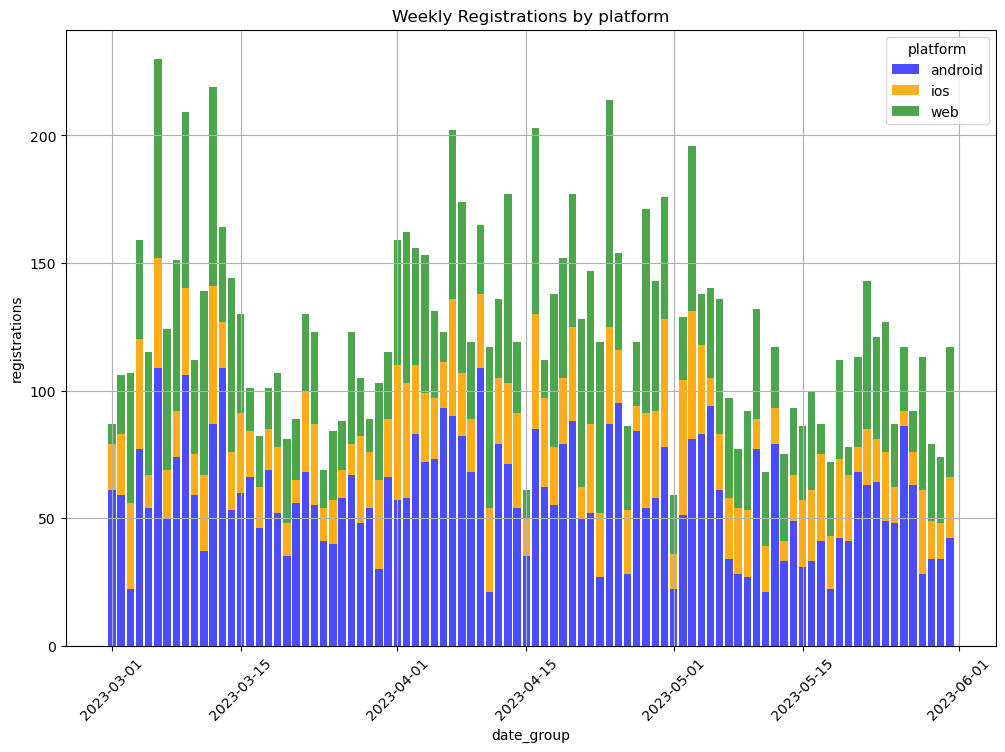

In [46]:
grouped_regs = filtered_regs.groupby(['datetime','platform']).count()
grouped_regs = grouped_regs.reset_index()
unique_platforms = grouped_regs['platform'].unique()
df = grouped_regs.drop(columns = ['email', 'registration_type'])

plt.figure(figsize=(12, 8))

df1 = df[df['platform'] == unique_platforms[0]]
x = df1['datetime']
y1 = np.array(df1['user_id'])
plt.bar(x, y1, color='b',alpha = 0.7, label=unique_platforms[0])

df2 = df[df['platform'] == unique_platforms[1]]
y2 = np.array(df2['user_id'])
plt.bar(x, y2,bottom=y1, color='orange',alpha = 0.9, label=unique_platforms[1])

df3 = df[df['platform'] == unique_platforms[2]]
y3 = np.array(df3['user_id'])
plt.bar(x, y3, bottom=y1 + y2, color='g', alpha = 0.7, label=unique_platforms[2])

plt.xticks(rotation = 45)
plt.grid()
plt.xlabel('date_group')
plt.ylabel('registrations')
plt.title("Weekly Registrations by platform")
plt.legend(title = 'platform')

plt.savefig('./charts/registrations_by_platform.png')

анализ с помощью dataframe.describe

In [47]:
filtered_regs.describe()

,datetime,email,platform,registration_type,user_id
count,11446,11446,11446,11446,11446
unique,92,11173,3,4,11446
top,2023-03-06,ujones@example.com,android,email,2e0f6bb8-b029-4f45-a786-2b53990d37f1
freq,230,4,5424,4728,1


In [48]:
filtered_visits.describe()

,datetime
count,128539
mean,2023-04-13 01:19:10.026295808
min,2023-03-01 00:00:43
25%,2023-03-19 11:53:26
50%,2023-04-12 21:59:30
75%,2023-05-04 07:12:07.500000
max,2023-05-31 23:59:38


удаление ботов из визитов

In [49]:
filtered_visits = filtered_visits[filtered_visits['platform'] != 'bot']
filtered_visits.head()

,datetime,platform,user_agent,visit_id
0,2023-03-01 10:36:22,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
2,2023-03-01 06:25:00,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,f149f542-e935-4870-9734-6b4501eaf614
5,2023-03-01 10:26:13,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
8,2023-03-01 12:33:06,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,19322fed-157c-49c6-b16e-2d5cabeb9592
10,2023-03-01 01:38:35,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,04762a22-3c9f-40c9-9ac9-6628c4381836


берем только последний визит для каждого visit_id

In [50]:
filtered_visits = filtered_visits.sort_values(by='datetime')
filtered_visits = filtered_visits.drop_duplicates(subset='visit_id', keep='last')
filtered_visits['datetime'] = pd.to_datetime(filtered_visits['datetime']).dt.date
filtered_visits.head()

,datetime,platform,user_agent,visit_id
537,2023-03-01,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,348148db-9841-4b42-a0e1-7631f4667f83
157,2023-03-01,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,65f98235-9667-460c-964e-5604b75b48a1
107,2023-03-01,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,31d17176-658a-425d-99ee-50c433af81d9
374,2023-03-01,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,52bc1d7e-6c8a-474b-82a6-73a4adfd4423
234,2023-03-01,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,3ac77737-906e-46f2-9cd0-a52354c2676f


График визитов с выделением рекламных кампаний

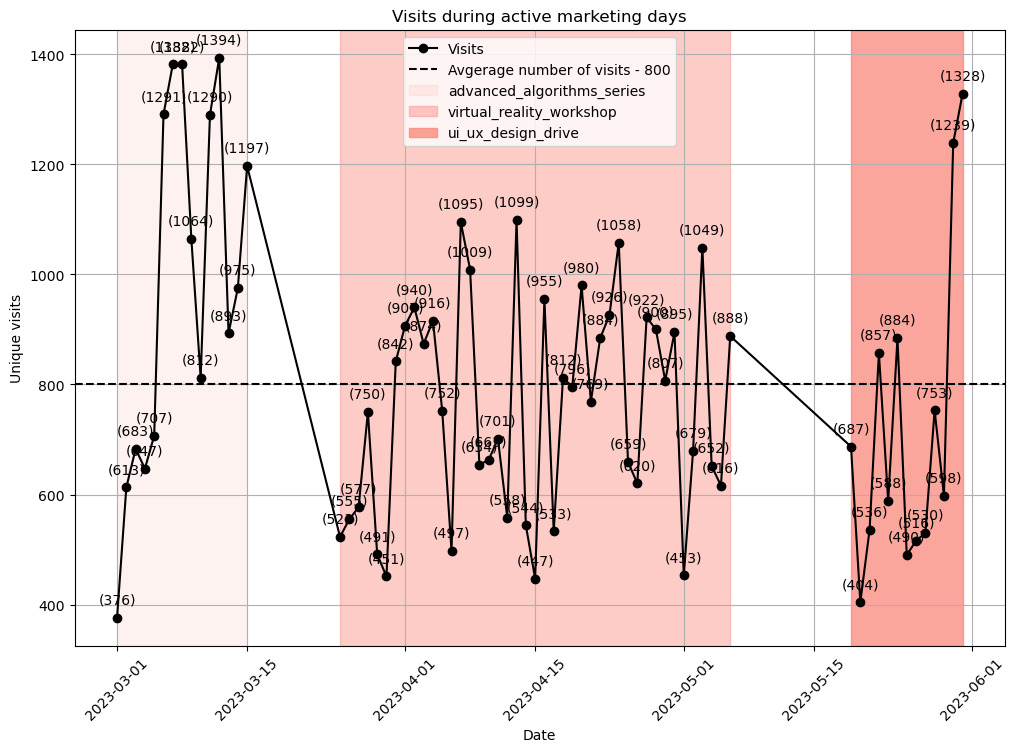

In [51]:
merged = pd.merge(filtered_visits, df_ads, how='left', left_on=['datetime'], right_on =['date'])
unique_visits = merged.groupby(['datetime', 'utm_campaign']).count()
unique_visits = unique_visits.reset_index()
x = unique_visits['datetime']
y = np.array(unique_visits['visit_id'])
fig, ax = plt.subplots(figsize=(12, 8)) 
plt.plot(x, y, marker='o', color= 'black', linestyle='-', label = 'Visits')

# add mean to the graph
plt.axhline(y=np.nanmean(y), color='black', linestyle='--', label=f'Avgerage number of visits - {round(np.nanmean(y))}')

label=f'Avgerage number of visits {round(np.nanmean(y))}'


# Add annotations
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'({yi})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')
 
# Add title and labels
plt.title('Visits during active marketing days')
plt.xlabel('Date')
plt.ylabel('Unique visits')

# Display grid
plt.grid(True)
plt.xticks(rotation = 45)

# color the graph
unique_campaign = unique_visits['utm_campaign'].unique()
for i in range(len(unique_campaign)):
    unique_visits1 = unique_visits[unique_visits['utm_campaign']== unique_campaign[i]]
    xmin = unique_visits1['datetime'].min()
    xmax = unique_visits1['datetime'].max()
    ax.axvspan(xmin, xmax, color = 'salmon',alpha=0.1 + 0.3 * i, label = unique_campaign[i])
    plt.legend()
plt.savefig('./charts/Visits during active marketing days.png')

Группируем данные визитов по датам

In [52]:
filtered_visits['datetime'] = pd.to_datetime(filtered_visits['datetime']).dt.date
grouped_visits_by_date = filtered_visits.groupby(['datetime']).count()
grouped_visits_by_date = grouped_visits_by_date.reset_index()
grouped_visits_by_date.head()

,datetime,platform,user_agent,visit_id
0,2023-03-01,376,376,376
1,2023-03-02,613,613,613
2,2023-03-03,683,683,683
3,2023-03-04,647,647,647
4,2023-03-05,707,707,707


рисуем график для визитов по дням

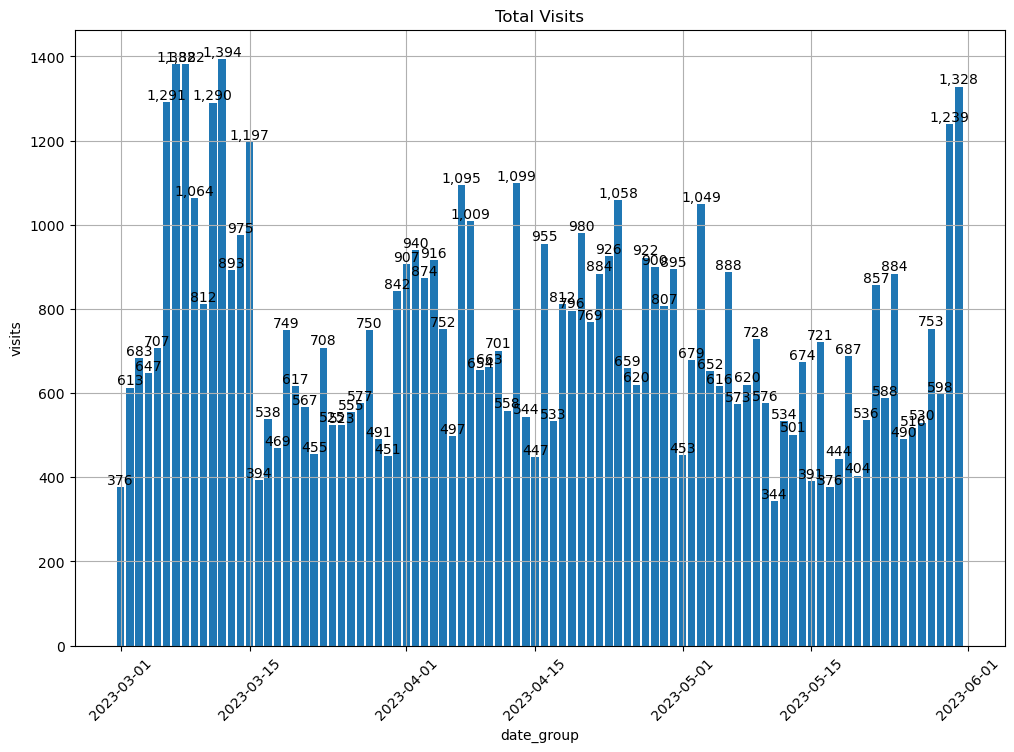

In [53]:
x = grouped_visits_by_date["datetime"]
y = grouped_visits_by_date["visit_id"]

fig, ax = plt.subplots(figsize=(12, 8))
bar_container = ax.bar(x, y)
ax.set(ylabel='visits', title='Total Visits')
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.xlabel('date_group')
plt.xticks(rotation = 45)
plt.grid()

plt.savefig('./charts/visits_by_date.png')

график для визитов по дням и платформам

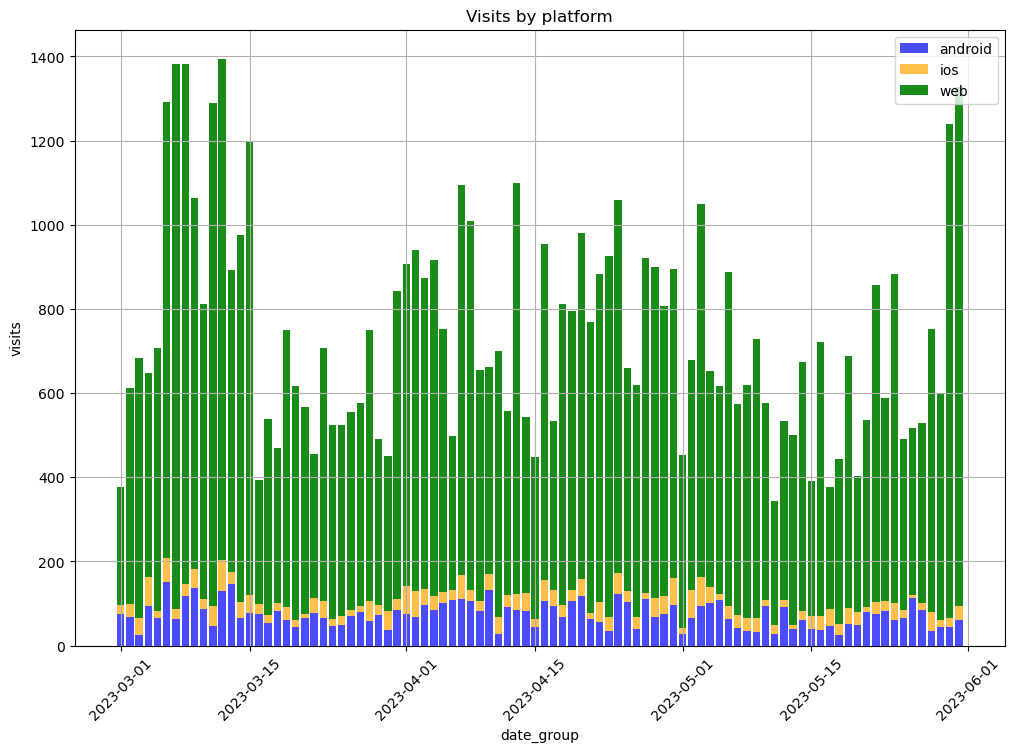

In [54]:
grouped_visits = filtered_visits.groupby(['datetime','platform']).count()
grouped_visits = grouped_visits.reset_index()
unique_platforms = grouped_visits['platform'].unique()
df = grouped_visits.drop(columns = 'user_agent')

plt.figure(figsize=(12, 8))

df1 = df[df['platform'] == unique_platforms[0]]
x = df1['datetime']
y1 = np.array(df1['visit_id'])
plt.bar(x, y1, color='b', alpha = 0.7, label=unique_platforms[0])

df2 = df[df['platform'] == unique_platforms[1]]
y2 = np.array(df2['visit_id'])
plt.bar(x, y2,bottom=y1, color='orange', alpha = 0.7, label=unique_platforms[1])

df3 = df[df['platform'] == unique_platforms[2]]
y3 = np.array(df3['visit_id'])
plt.bar(x, y3, bottom=y1 + y2, color='g', alpha = 0.9, label=unique_platforms[2])

plt.xticks(rotation = 45)
plt.grid()
plt.xlabel('date_group')
plt.ylabel('visits')
plt.title("Visits by platform")
plt.legend(loc = 'upper right')

plt.savefig('./charts/visits_by_platform.png')

объединяем визиты и регистацию

In [55]:
merged = pd.merge(grouped_visits, grouped_regs, how='inner', left_on=['datetime', 'platform'], right_on =['datetime', 'platform'])
merged = merged.reset_index()
merged.head()

,index,datetime,platform,user_agent,visit_id,email,registration_type,user_id
0,0,2023-03-01,android,75,75,61,61,61
1,1,2023-03-01,ios,22,22,18,18,18
2,2,2023-03-01,web,279,279,8,8,8
3,3,2023-03-02,android,67,67,59,59,59
4,4,2023-03-02,ios,31,31,24,24,24


считаем конверсию

In [56]:
merged['conversion'] = merged['user_id'] * 100 / merged['visit_id']
merged.head()

,index,datetime,platform,user_agent,visit_id,email,registration_type,user_id,conversion
0,0,2023-03-01,android,75,75,61,61,61,81.333333
1,1,2023-03-01,ios,22,22,18,18,18,81.818182
2,2,2023-03-01,web,279,279,8,8,8,2.867384
3,3,2023-03-02,android,67,67,59,59,59,88.059701
4,4,2023-03-02,ios,31,31,24,24,24,77.419355


переименовываем название столбцов и удаляем лишние столбцы

In [57]:
merged = merged.rename(columns={'user_id': 'registrations', 'visit_id': 'visits', 'datetime': 'date_group'})
merged.head()

,index,date_group,platform,user_agent,visits,email,registration_type,registrations,conversion
0,0,2023-03-01,android,75,75,61,61,61,81.333333
1,1,2023-03-01,ios,22,22,18,18,18,81.818182
2,2,2023-03-01,web,279,279,8,8,8,2.867384
3,3,2023-03-02,android,67,67,59,59,59,88.059701
4,4,2023-03-02,ios,31,31,24,24,24,77.419355


In [58]:
merged = merged.drop(columns=['index', 'user_agent', 'email', 'registration_type'])
merged.head()

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,75,61,81.333333
1,2023-03-01,ios,22,18,81.818182
2,2023-03-01,web,279,8,2.867384
3,2023-03-02,android,67,59,88.059701
4,2023-03-02,ios,31,24,77.419355


сортировка по дате, от ранних к более поздним

In [59]:
merged.sort_values(by='date_group')
merged.head()

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,75,61,81.333333
1,2023-03-01,ios,22,18,81.818182
2,2023-03-01,web,279,8,2.867384
3,2023-03-02,android,67,59,88.059701
4,2023-03-02,ios,31,24,77.419355


сохранение датафрейма в JSON 

In [60]:
merged.to_json('./conversion.json', index = False)

График для итоговых конверсий

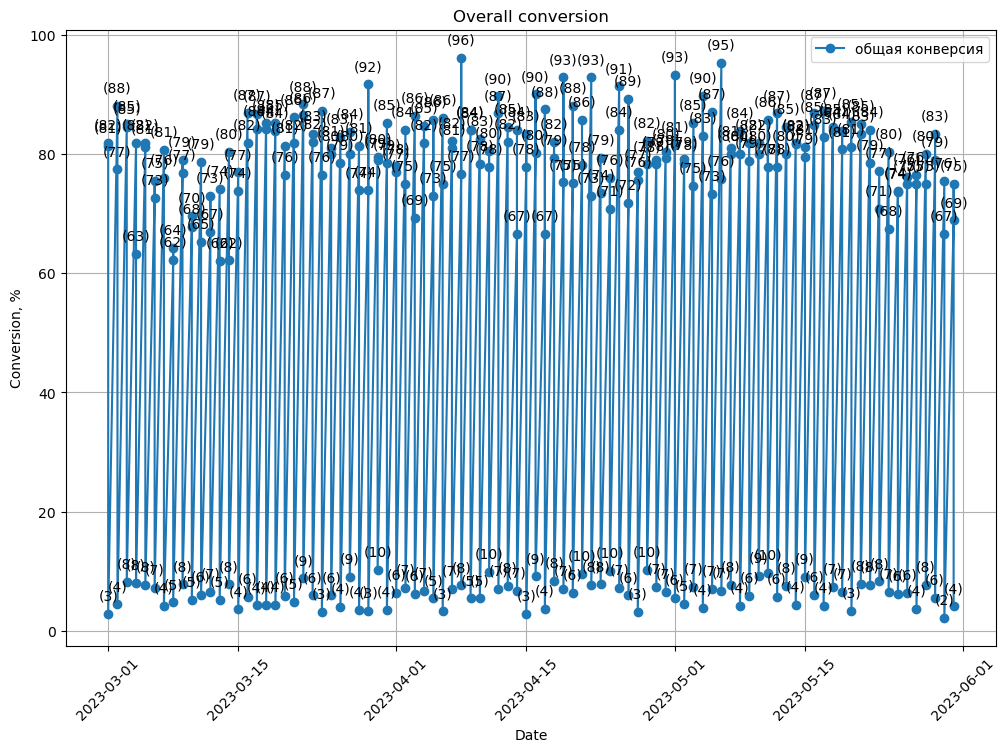

In [61]:
# Sample data
x = merged['date_group']
y = merged['conversion']

# Create a line chart
plt.figure(figsize=(12, 8))
plt.plot(x, y, marker='o', linestyle='-', label = 'общая конверсия')
 
# Add annotations
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'({round(yi)})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')
 
# Add title and labels
plt.title('Overall conversion')
plt.xlabel('Date')
plt.ylabel('Conversion, %')
 
# Display grid
plt.grid(True)
plt.xticks(rotation = 45)
plt.legend()

plt.savefig('./charts/conversion.png')

Конверсия по каждой платформе

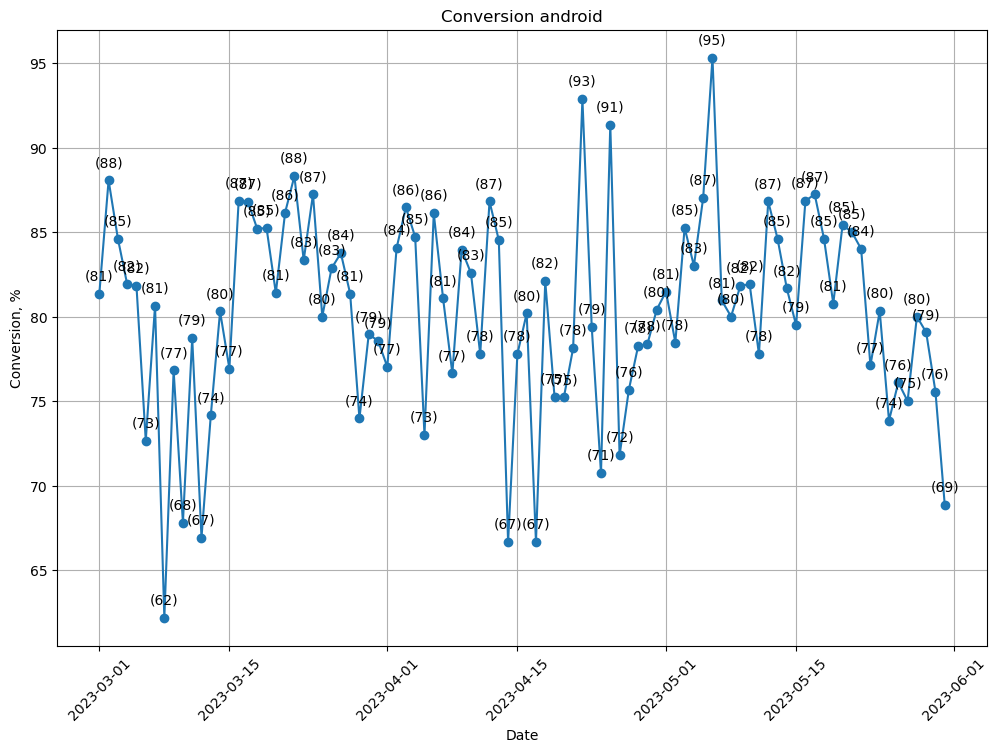

In [62]:
unique_platforms = merged['platform'].unique()

df1 = merged.where(merged['platform'] == unique_platforms[0])
df1 = df1[df1['platform'].notna()]
x = df1['date_group']
y = np.array(df1['conversion'])
# Create a line chart

plt.figure(figsize=(12, 8))
plt.plot(x, y, marker='o', linestyle='-')
 
# Add annotations
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'({round(yi)})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')
 
# Add title and labels
plt.title(f'Conversion {unique_platforms[0]}')
plt.xlabel('Date')
plt.ylabel('Conversion, %')
 
# Display grid
plt.grid(True)
plt.xticks(rotation = 45)

plt.savefig('./charts/conversion_andriod.png')

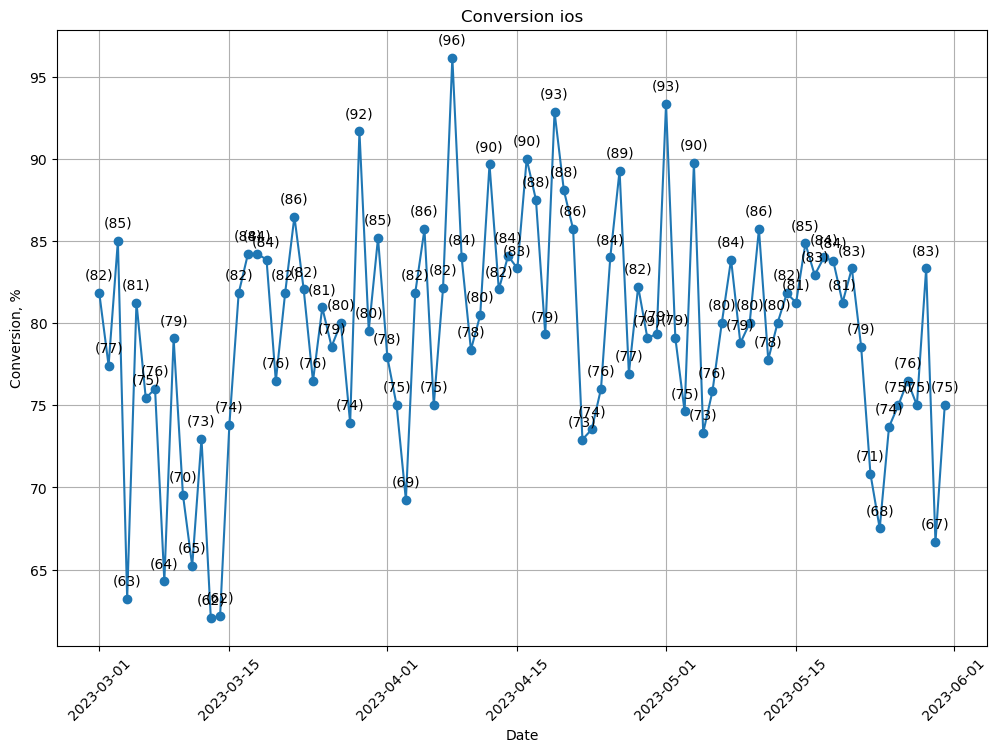

In [63]:
df1 = merged.where(merged['platform'] == unique_platforms[1])
df1 = df1[df1['platform'].notna()]
x = df1['date_group']
y = np.array(df1['conversion'])
# Create a line chart

plt.figure(figsize=(12, 8))
plt.plot(x, y, marker='o', linestyle='-')
 
# Add annotations
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'({round(yi)})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')
 
# Add title and labels
plt.title(f'Conversion {unique_platforms[1]}')
plt.xlabel('Date')
plt.ylabel('Conversion, %')
 
# Display grid
plt.grid(True)
plt.xticks(rotation = 45)

plt.savefig('./charts/conversion_ios.png')

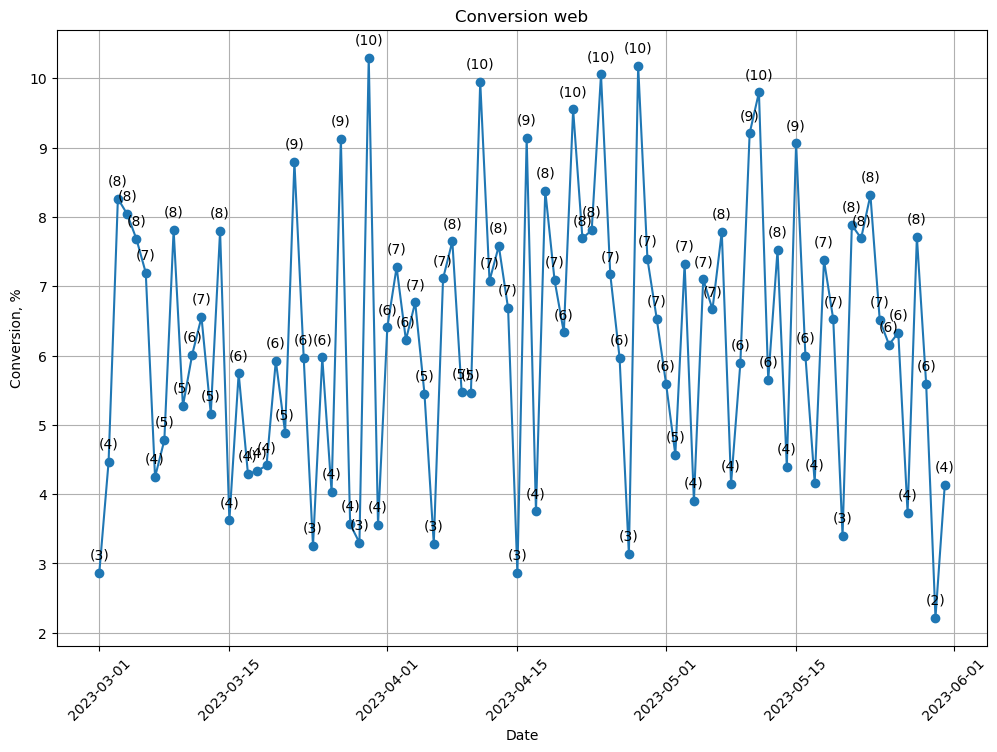

In [64]:
df1 = merged.where(merged['platform'] == unique_platforms[2])
df1 = df1[df1['platform'].notna()]
x = df1['date_group']
y = np.array(df1['conversion'])
# Create a line chart

plt.figure(figsize=(12, 8))
plt.plot(x, y, marker='o', linestyle='-')
 
# Add annotations
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'({round(yi)})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')
 
# Add title and labels
plt.title(f'Conversion {unique_platforms[2]}')
plt.xlabel('Date')
plt.ylabel('Conversion, %')
 
# Display grid
plt.grid(True)
plt.xticks(rotation = 45)

plt.savefig('./charts/conversion_web.png')

загружаем данные с рекламой

In [65]:
df_ads = pd.read_csv("https://raw.githubusercontent.com/callisto1610/data-analytics-project-100/main/ads%20-%20ads.csv")
df_ads['date'] = pd.to_datetime(df_ads['date']).dt.date
df_ads.head()

,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,google,cpc,advanced_algorithms_series,212
1,2023-03-02,google,cpc,advanced_algorithms_series,252
2,2023-03-03,google,cpc,advanced_algorithms_series,202
3,2023-03-04,google,cpc,advanced_algorithms_series,223
4,2023-03-05,google,cpc,advanced_algorithms_series,265


Объедините датайфрейм конверсий с рекламными кампаниями

In [66]:
ads = pd.merge(merged, df_ads, how='left', left_on='date_group', right_on ='date')
ads.head()

,date_group,platform,visits,registrations,conversion,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,android,75,61,81.333333,2023-03-01,google,cpc,advanced_algorithms_series,212.0
1,2023-03-01,ios,22,18,81.818182,2023-03-01,google,cpc,advanced_algorithms_series,212.0
2,2023-03-01,web,279,8,2.867384,2023-03-01,google,cpc,advanced_algorithms_series,212.0
3,2023-03-02,android,67,59,88.059701,2023-03-02,google,cpc,advanced_algorithms_series,252.0
4,2023-03-02,ios,31,24,77.419355,2023-03-02,google,cpc,advanced_algorithms_series,252.0


удаляем лишние столбцы

In [67]:
ads = ads.drop(columns=['platform', 'conversion', 'date', 'utm_source', 'utm_medium'])
ads.head()

,date_group,visits,registrations,utm_campaign,cost
0,2023-03-01,75,61,advanced_algorithms_series,212.0
1,2023-03-01,22,18,advanced_algorithms_series,212.0
2,2023-03-01,279,8,advanced_algorithms_series,212.0
3,2023-03-02,67,59,advanced_algorithms_series,252.0
4,2023-03-02,31,24,advanced_algorithms_series,252.0


Сагрегируем данные по дате 

In [68]:
ads = ads.groupby(['date_group', 'utm_campaign']).sum()
ads = ads.reset_index()
ads.head()

,date_group,utm_campaign,visits,registrations,cost
0,2023-03-01,advanced_algorithms_series,376,87,636.0
1,2023-03-02,advanced_algorithms_series,613,106,756.0
2,2023-03-03,advanced_algorithms_series,683,107,606.0
3,2023-03-04,advanced_algorithms_series,647,159,669.0
4,2023-03-05,advanced_algorithms_series,707,115,795.0


In [69]:
ads = ads[['date_group', 'visits', 'registrations', 'cost', 'utm_campaign']]
ads.head()

,date_group,visits,registrations,cost,utm_campaign
0,2023-03-01,376,87,636.0,advanced_algorithms_series
1,2023-03-02,613,106,756.0,advanced_algorithms_series
2,2023-03-03,683,107,606.0,advanced_algorithms_series
3,2023-03-04,647,159,669.0,advanced_algorithms_series
4,2023-03-05,707,115,795.0,advanced_algorithms_series


сортировка по дате, от ранних к более поздним

In [70]:
ads.sort_values(by='date_group')
ads.head()

,date_group,visits,registrations,cost,utm_campaign
0,2023-03-01,376,87,636.0,advanced_algorithms_series
1,2023-03-02,613,106,756.0,advanced_algorithms_series
2,2023-03-03,683,107,606.0,advanced_algorithms_series
3,2023-03-04,647,159,669.0,advanced_algorithms_series
4,2023-03-05,707,115,795.0,advanced_algorithms_series


График стоимости реклам

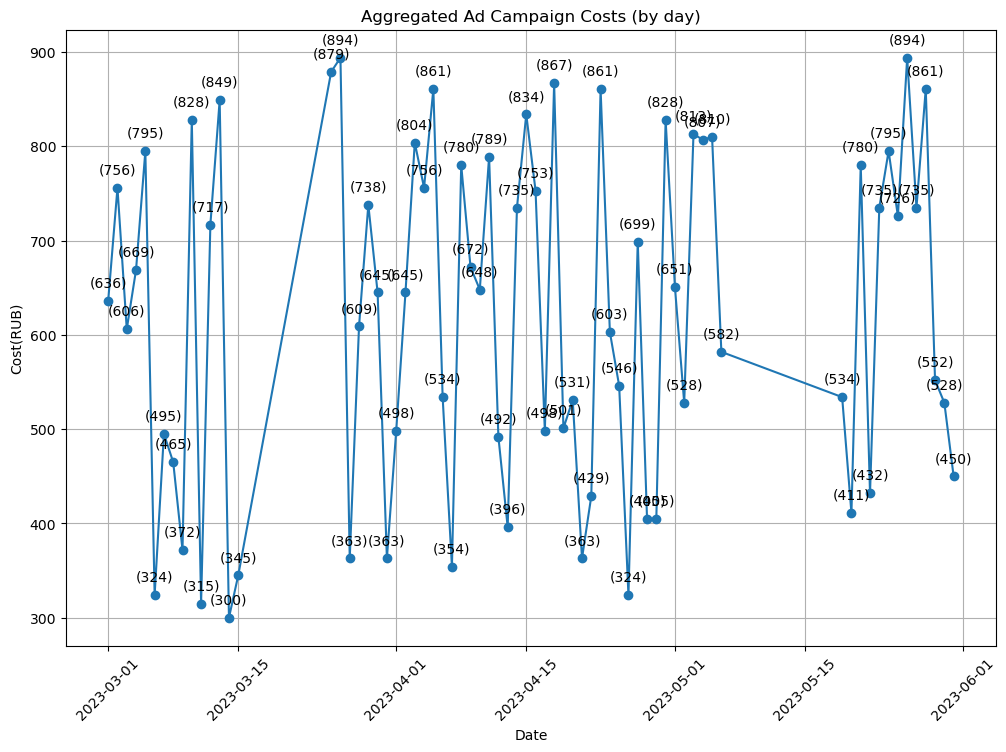

In [71]:
x = ads['date_group']
y = np.array(ads['cost'])
# Create a line chart

plt.figure(figsize=(12, 8))
plt.plot(x, y, marker='o', linestyle='-')
 
# Add annotations
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'({round(yi)})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')
 
# Add title and labels
plt.title('Aggregated Ad Campaign Costs (by day)')
plt.xlabel('Date')
plt.ylabel('Cost(RUB)')
 
# Display grid
plt.grid(True)
plt.xticks(rotation = 45)
 
plt.savefig('./charts/ads.png')

сохраним данные в JSON

In [72]:
ads.to_json('./ads.json')